<a href="https://colab.research.google.com/github/poporubeus/Chess_network/blob/main/NONTOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_excel('/content/TOP100_GM2020.xlsx')
top100 = pd.DataFrame(data)

In [15]:
top100

,Tabella 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,"Carlsen, Magnus",g,NOR,2862,0,1990
1,2,"Caruana, Fabiano",g,USA,2842,0,1992
2,3,"Ding, Liren",g,CHN,2805,0,1992
3,4,"Grischuk, Alexander",g,RUS,2777,0,1983
4,5,"Nepomniachtchi, Ian",g,RUS,2774,0,1990
...,...,...,...,...,...,...,...
95,96,"Cori, Jorge",g,PER,2652,0,1995
96,97,"Oparin, Grigoriy",g,RUS,2652,0,1997
97,98,"Grandelius, Nils",g,SWE,2651,9,1993
98,99,"Rublevsky, Sergei",g,RUS,2651,0,1974


In [16]:
top100 = top100.rename(columns={"Tabella 1": "Rank", "Unnamed: 1": "Name", "Unnamed: 2": "Title",
                                "Unnamed: 3": "Country", "Unnamed: 4": "ELO", "Unnamed: 5": "Games",
                                "Unnamed: 6": "Date of birth"})

In [17]:
top100

,Rank,Name,Title,Country,ELO,Games,Date of birth
0,1,"Carlsen, Magnus",g,NOR,2862,0,1990
1,2,"Caruana, Fabiano",g,USA,2842,0,1992
2,3,"Ding, Liren",g,CHN,2805,0,1992
3,4,"Grischuk, Alexander",g,RUS,2777,0,1983
4,5,"Nepomniachtchi, Ian",g,RUS,2774,0,1990
...,...,...,...,...,...,...,...
95,96,"Cori, Jorge",g,PER,2652,0,1995
96,97,"Oparin, Grigoriy",g,RUS,2652,0,1997
97,98,"Grandelius, Nils",g,SWE,2651,9,1993
98,99,"Rublevsky, Sergei",g,RUS,2651,0,1974


In [18]:
top100 = top100.drop(columns=['Games', 'Title'])

In [20]:
top100

,Rank,Name,Country,ELO,Date of birth
0,1,"Carlsen, Magnus",NOR,2862,1990
1,2,"Caruana, Fabiano",USA,2842,1992
2,3,"Ding, Liren",CHN,2805,1992
3,4,"Grischuk, Alexander",RUS,2777,1983
4,5,"Nepomniachtchi, Ian",RUS,2774,1990
...,...,...,...,...,...
95,96,"Cori, Jorge",PER,2652,1995
96,97,"Oparin, Grigoriy",RUS,2652,1997
97,98,"Grandelius, Nils",SWE,2651,1993
98,99,"Rublevsky, Sergei",RUS,2651,1974


In [82]:
def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe, low_memory = False)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df.dropna()
  return new_df

path2020 = '/content/chess_data_2020.csv'
df2020 = clean_dataframe(path2020)

In [83]:
df2020

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [84]:
top100_list = top100['Name'].to_list()

In [87]:
def get_initials(full_name):
    surname, name = full_name.split(', ')
    return f'{surname}, {name[0]}'

# Apply the function to the 'Full_Name' column
top100['Name'] = top100['Name'].apply(get_initials)


In [88]:
top100

,Rank,Name,Country,ELO,Date of birth
0,1,"Carlsen, M",NOR,2862,1990
1,2,"Caruana, F",USA,2842,1992
2,3,"Ding, L",CHN,2805,1992
3,4,"Grischuk, A",RUS,2777,1983
4,5,"Nepomniachtchi, I",RUS,2774,1990
...,...,...,...,...,...
95,96,"Cori, J",PER,2652,1995
96,97,"Oparin, G",RUS,2652,1997
97,98,"Grandelius, N",SWE,2651,1993
98,99,"Rublevsky, S",RUS,2651,1974


In [89]:
da_rimuovere = top100['Name'].to_list()

In [90]:
df2020['White'] = df2020['White'].apply(lambda x: None if x in da_rimuovere else x)
df2020['Black'] = df2020['Black'].apply(lambda x: None if x in da_rimuovere else x)
#df2020.dropna(subset=['White', 'Black'], how='all', inplace=True)

# Reset index if needed
df2020.reset_index(drop=True, inplace=True)


In [91]:
df2020

,White,Black,Result,Date,Opening
0,None,None,1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M",None,½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,None,None,½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,None,None,½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,None,None,½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [92]:
df2020 = df2020.dropna()

In [93]:
df2020_rimossi = df2020

In [94]:
df2020_rimossi

,White,Black,Result,Date,Opening
84,"Butkiewicz, L","Malicka, M",½-½,"Dec 30, 2020","E36 Nimzo-Indian, classical, Noa variation, 5.a3"
85,"Ustianovich, N","Ochedzan, T",1-0,"Dec 30, 2020",E60 King's Indian defence
86,"Redzisz, M","Sanz Wawer, D",0-1,"Dec 30, 2020","B31 Sicilian, Nimzovich-Rossolimo attack (with..."
87,"Pasti, A","Szpar, M",½-½,"Dec 30, 2020",C11 French defence
88,"Fiedorek, M","Kopylov, M",½-½,"Dec 30, 2020","B42 Sicilian, Kan, 5.Bd3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [79]:
import networkx as nx

G_rimossi = nx.from_pandas_edgelist(df=df2020_rimossi, source='White', target='Black')

In [95]:
degree = dict(G_rimossi.degree())

In [98]:
degree

{'Butkiewicz, L': 12,
 'Malicka, M': 21,
 'Ustianovich, N': 6,
 'Ochedzan, T': 20,
 'Redzisz, M': 14,
 'Sanz Wawer, D': 8,
 'Pasti, A': 42,
 'Szpar, M': 25,
 'Fiedorek, M': 6,
 'Kopylov, M': 37,
 'Klepek, W': 16,
 'Goluch, P': 6,
 'Godzwon, I': 25,
 'Szustakowski, A': 12,
 'Sliwicka, A': 40,
 'Chmiel, M': 6,
 'Paszewski, M': 20,
 'Kokoszczynski, J': 18,
 'Wisniewski, M': 6,
 'Kucza, K': 12,
 'Sadzikowski, D': 28,
 'Skawinski, A': 11,
 'Chyzy, J': 25,
 'Vardanyan, A': 15,
 'Suder, J': 12,
 'Konyves, A': 18,
 'Kubicka, A': 26,
 'Golubka, P': 17,
 'Kozak, A': 65,
 'Lisowski, K': 6,
 'Mis, M': 25,
 'Jankowiak, T': 6,
 'Lorscheid, G': 6,
 'Kopylov, D': 14,
 'Kucharska, H': 24,
 'Braeuning, R': 29,
 'Sernecki, F': 24,
 'Golecki, J': 12,
 'Kiolbasa, O': 17,
 'Popiol, M': 11,
 'Luberanski, J': 6,
 'Golda, S': 6,
 'Gumularz, S': 30,
 'Fus, J': 10,
 'Suliborski, J': 6,
 'Chylewski, P': 25,
 'Hasterok, M': 6,
 'Trybus, D': 6,
 'Krzywda, A': 12,
 'Bablok, M': 5,
 'Salna, A': 6,
 'Jarzebowski, K': 

In [96]:
names_NONTOP = degree.keys()
degree_valNONTOP = []
for key in degree.keys():
  degree_valNONTOP.append(degree[key])


In [97]:
degree_valNONTOP

[12,
 21,
 6,
 20,
 14,
 8,
 42,
 25,
 6,
 37,
 16,
 6,
 25,
 12,
 40,
 6,
 20,
 18,
 6,
 12,
 28,
 11,
 25,
 15,
 12,
 18,
 26,
 17,
 65,
 6,
 25,
 6,
 6,
 14,
 24,
 29,
 24,
 12,
 17,
 11,
 6,
 6,
 30,
 10,
 6,
 25,
 6,
 6,
 12,
 5,
 6,
 6,
 12,
 17,
 20,
 16,
 19,
 22,
 27,
 12,
 6,
 6,
 7,
 12,
 82,
 29,
 14,
 47,
 31,
 28,
 24,
 21,
 30,
 22,
 23,
 19,
 27,
 28,
 39,
 9,
 19,
 21,
 14,
 49,
 9,
 16,
 9,
 26,
 29,
 9,
 14,
 21,
 18,
 19,
 11,
 14,
 4,
 8,
 4,
 4,
 26,
 26,
 20,
 28,
 10,
 6,
 5,
 4,
 9,
 5,
 6,
 6,
 7,
 5,
 6,
 5,
 12,
 3,
 4,
 5,
 6,
 32,
 6,
 5,
 23,
 32,
 23,
 8,
 19,
 17,
 29,
 26,
 18,
 19,
 17,
 25,
 20,
 30,
 16,
 10,
 29,
 24,
 12,
 3,
 14,
 11,
 13,
 14,
 4,
 5,
 4,
 8,
 4,
 5,
 43,
 46,
 3,
 28,
 3,
 24,
 10,
 35,
 25,
 23,
 29,
 10,
 11,
 11,
 10,
 11,
 10,
 29,
 11,
 9,
 11,
 13,
 10,
 10,
 11,
 13,
 11,
 11,
 21,
 29,
 14,
 11,
 19,
 11,
 11,
 28,
 10,
 25,
 13,
 19,
 1,
 27,
 6,
 23,
 34,
 51,
 42,
 45,
 48,
 16,
 37,
 29,
 31,
 23,
 23,
 34,
 29,
 28

In [101]:
names_NONTOP = list(names_NONTOP)
names_NONTOP

['Butkiewicz, L',
 'Malicka, M',
 'Ustianovich, N',
 'Ochedzan, T',
 'Redzisz, M',
 'Sanz Wawer, D',
 'Pasti, A',
 'Szpar, M',
 'Fiedorek, M',
 'Kopylov, M',
 'Klepek, W',
 'Goluch, P',
 'Godzwon, I',
 'Szustakowski, A',
 'Sliwicka, A',
 'Chmiel, M',
 'Paszewski, M',
 'Kokoszczynski, J',
 'Wisniewski, M',
 'Kucza, K',
 'Sadzikowski, D',
 'Skawinski, A',
 'Chyzy, J',
 'Vardanyan, A',
 'Suder, J',
 'Konyves, A',
 'Kubicka, A',
 'Golubka, P',
 'Kozak, A',
 'Lisowski, K',
 'Mis, M',
 'Jankowiak, T',
 'Lorscheid, G',
 'Kopylov, D',
 'Kucharska, H',
 'Braeuning, R',
 'Sernecki, F',
 'Golecki, J',
 'Kiolbasa, O',
 'Popiol, M',
 'Luberanski, J',
 'Golda, S',
 'Gumularz, S',
 'Fus, J',
 'Suliborski, J',
 'Chylewski, P',
 'Hasterok, M',
 'Trybus, D',
 'Krzywda, A',
 'Bablok, M',
 'Salna, A',
 'Jarzebowski, K',
 'Brodowski, P',
 'Niedbala, B',
 'Seemann, J',
 'Lewtak, D',
 'Baum, J',
 'Nasuta, G',
 'Janik, I',
 'Kyc, J',
 'Deuer, M',
 'Jarmula, L',
 'Sieciechowicz, M',
 'Wikar, M',
 'Donchenko, A

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

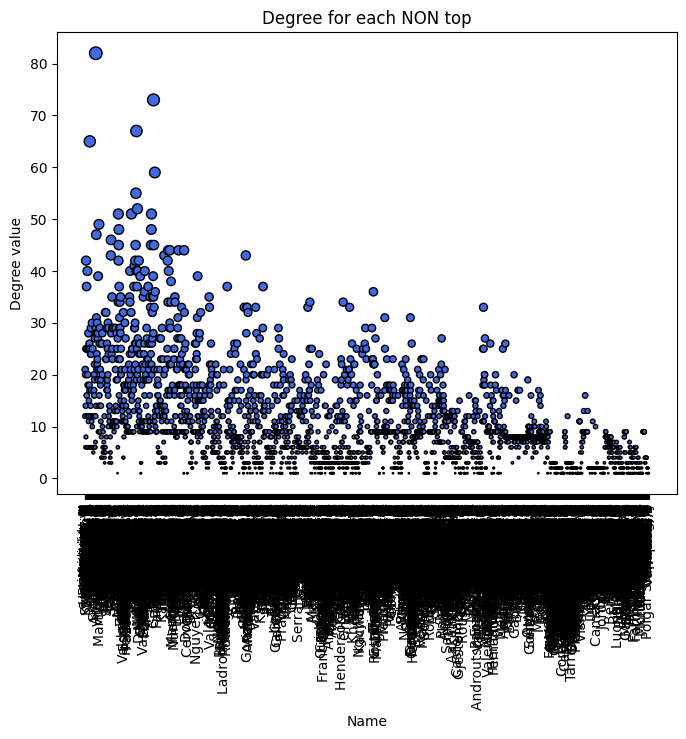

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(names_NONTOP, degree_valNONTOP, marker='o', s=degree_valNONTOP,alpha=1,edgecolors='black',linewidth=1, c='royalblue')
plt.xlabel('Name')
plt.ylabel('Degree value')
plt.title('Degree for each NON top')
plt.xticks(rotation=90)

In [105]:
betweenness = dict(nx.betweenness_centrality(G_rimossi))

In [106]:
names_NONTOP_bet = betweenness.keys()
bet_valNONTOP = []
for key in betweenness.keys():
  bet_valNONTOP.append(betweenness[key])

In [109]:
betweenness

{'Butkiewicz, L': 0.0003163783951708506,
 'Malicka, M': 0.0015547158492055946,
 'Ustianovich, N': 4.8252664759077386e-05,
 'Ochedzan, T': 0.0021474000906356113,
 'Redzisz, M': 0.0018860463707372336,
 'Sanz Wawer, D': 0.0002968597367613167,
 'Pasti, A': 0.011894388229717955,
 'Szpar, M': 0.004409600653091652,
 'Fiedorek, M': 8.879682914569059e-05,
 'Kopylov, M': 0.004983175288604529,
 'Klepek, W': 0.001381711242110262,
 'Goluch, P': 4.3762879761640584e-05,
 'Godzwon, I': 0.004705586737174297,
 'Szustakowski, A': 0.0007610456300696958,
 'Sliwicka, A': 0.014051336443966018,
 'Chmiel, M': 0.00021225220851601642,
 'Paszewski, M': 0.0025313276386174453,
 'Kokoszczynski, J': 0.003420489784592627,
 'Wisniewski, M': 0.00019723871872814742,
 'Kucza, K': 0.002217208458231298,
 'Sadzikowski, D': 0.007363775245290057,
 'Skawinski, A': 0.000495502500033547,
 'Chyzy, J': 0.0020077889582599956,
 'Vardanyan, A': 0.0019379823239672625,
 'Suder, J': 0.00044977515617906965,
 'Konyves, A': 0.00259880067222

In [108]:
names_NONTOP_bet = list(names_NONTOP_bet)
names_NONTOP_bet

['Butkiewicz, L',
 'Malicka, M',
 'Ustianovich, N',
 'Ochedzan, T',
 'Redzisz, M',
 'Sanz Wawer, D',
 'Pasti, A',
 'Szpar, M',
 'Fiedorek, M',
 'Kopylov, M',
 'Klepek, W',
 'Goluch, P',
 'Godzwon, I',
 'Szustakowski, A',
 'Sliwicka, A',
 'Chmiel, M',
 'Paszewski, M',
 'Kokoszczynski, J',
 'Wisniewski, M',
 'Kucza, K',
 'Sadzikowski, D',
 'Skawinski, A',
 'Chyzy, J',
 'Vardanyan, A',
 'Suder, J',
 'Konyves, A',
 'Kubicka, A',
 'Golubka, P',
 'Kozak, A',
 'Lisowski, K',
 'Mis, M',
 'Jankowiak, T',
 'Lorscheid, G',
 'Kopylov, D',
 'Kucharska, H',
 'Braeuning, R',
 'Sernecki, F',
 'Golecki, J',
 'Kiolbasa, O',
 'Popiol, M',
 'Luberanski, J',
 'Golda, S',
 'Gumularz, S',
 'Fus, J',
 'Suliborski, J',
 'Chylewski, P',
 'Hasterok, M',
 'Trybus, D',
 'Krzywda, A',
 'Bablok, M',
 'Salna, A',
 'Jarzebowski, K',
 'Brodowski, P',
 'Niedbala, B',
 'Seemann, J',
 'Lewtak, D',
 'Baum, J',
 'Nasuta, G',
 'Janik, I',
 'Kyc, J',
 'Deuer, M',
 'Jarmula, L',
 'Sieciechowicz, M',
 'Wikar, M',
 'Donchenko, A

In [110]:
bet_valNONTOP

[0.0003163783951708506,
 0.0015547158492055946,
 4.8252664759077386e-05,
 0.0021474000906356113,
 0.0018860463707372336,
 0.0002968597367613167,
 0.011894388229717955,
 0.004409600653091652,
 8.879682914569059e-05,
 0.004983175288604529,
 0.001381711242110262,
 4.3762879761640584e-05,
 0.004705586737174297,
 0.0007610456300696958,
 0.014051336443966018,
 0.00021225220851601642,
 0.0025313276386174453,
 0.003420489784592627,
 0.00019723871872814742,
 0.002217208458231298,
 0.007363775245290057,
 0.000495502500033547,
 0.0020077889582599956,
 0.0019379823239672625,
 0.00044977515617906965,
 0.0025988006722214726,
 0.0030511713871355325,
 0.002127888532863779,
 0.04022519117406228,
 0.0005391933158256293,
 0.005504442664670605,
 0.00015129023502450994,
 0.00046400777206257235,
 0.0004812283269927679,
 0.0025448342717459683,
 0.0022492463468301465,
 0.003922335584993166,
 0.0013603055922282643,
 0.0018173931581082327,
 0.0006852810762096276,
 0.0005030069473826461,
 1.8132111952635996e-05,

Text(0.5, 1.0, 'Degree vs Betweenness for NON TOP')

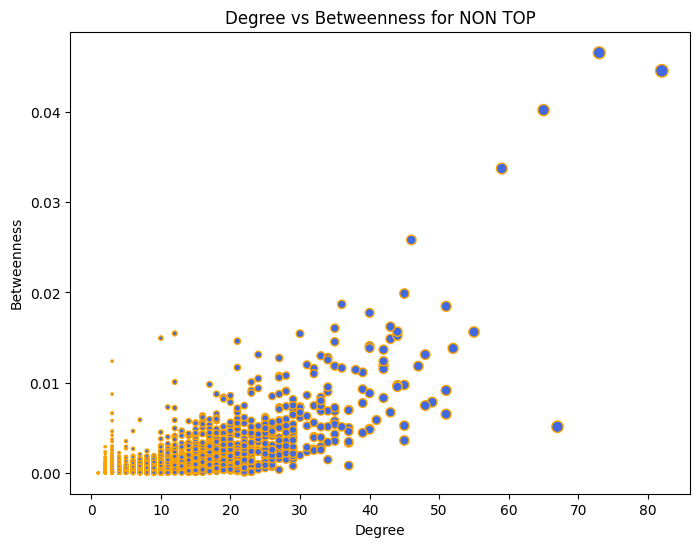

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(degree_valNONTOP, bet_valNONTOP, marker='o', s=degree_valNONTOP,alpha=1,edgecolors='orange',linewidth=1, c='royalblue')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.title('Degree vs Betweenness for NON TOP')
#plt.xticks(rotation=90)

In [112]:
ccoeff = dict(nx.clustering(G_rimossi))

In [113]:

names_NONTOP_clust = ccoeff.keys()
cluster_valNONTOP = []
for key in ccoeff.keys():
  cluster_valNONTOP.append(ccoeff[key])

Text(0.5, 1.0, 'Degree vs Cluster for NON TOP')

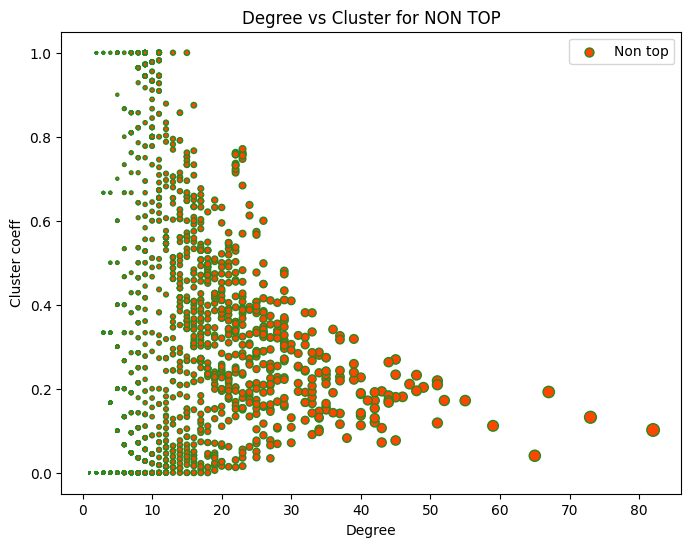

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(degree_valNONTOP, cluster_valNONTOP, marker='o', s=degree_valNONTOP,alpha=1,edgecolors='forestgreen',linewidth=1, c='orangered', label='Non top')
plt.xlabel('Degree')
plt.ylabel('Cluster coeff')
plt.legend(loc='best')
plt.title('Degree vs Cluster for NON TOP')

In [121]:
Gtotal = nx.from_pandas_edgelist(df2020, 'White', 'Black')

In [122]:
degree_total = dict(Gtotal.degree())
cluster_total = dict(nx.clustering(Gtotal))

In [123]:
names_total_clust = cluster_total.keys()
cluster_valtotal = []
for key in cluster_total.keys():
  cluster_valtotal.append(cluster_total[key])

In [124]:
names_total_degree = degree_total.keys()
degree_valtotal = []
for key in degree_total.keys():
  degree_valtotal.append(degree_total[key])

Text(0.5, 1.0, 'Degree vs Cluster for NON TOP')

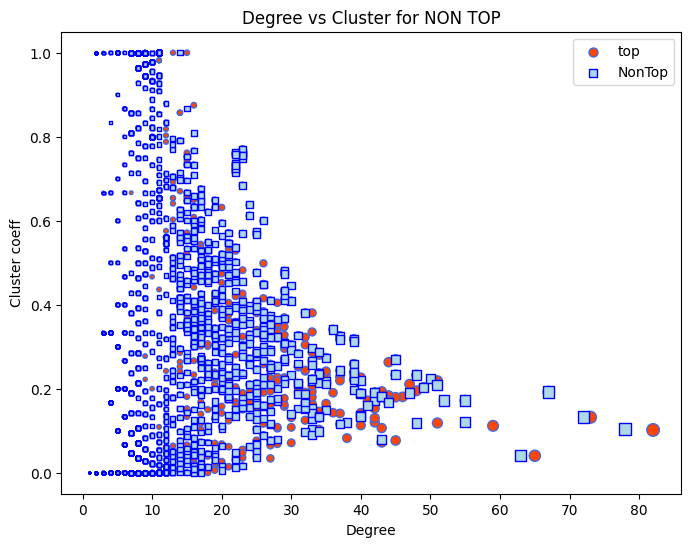

In [128]:
plt.figure(figsize=(8,6))
plt.scatter(degree_valNONTOP, cluster_valNONTOP, marker='o', s=degree_valNONTOP,alpha=1,edgecolors='royalblue',linewidth=1, c='orangered', label='top')
plt.scatter(degree_valtotal, cluster_valtotal, marker='s', s=degree_valtotal,alpha=1,edgecolors='blue',linewidth=1, c='lightblue', label='NonTop')
plt.xlabel('Degree')
plt.ylabel('Cluster coeff')
plt.legend(loc='best')
plt.title('Degree vs Cluster for NON TOP')

<BarContainer object of 3371 artists>

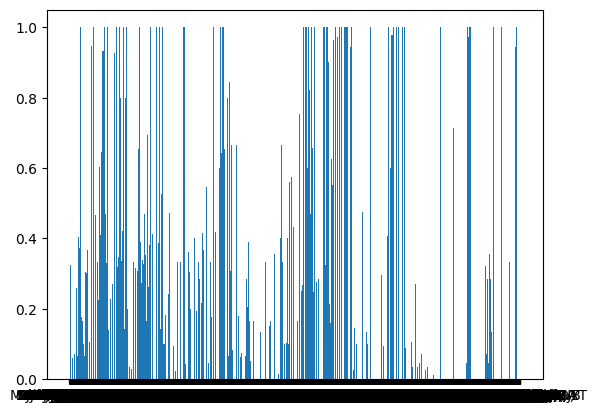

In [129]:
plt.bar(names_NONTOP_clust, cluster_valNONTOP)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

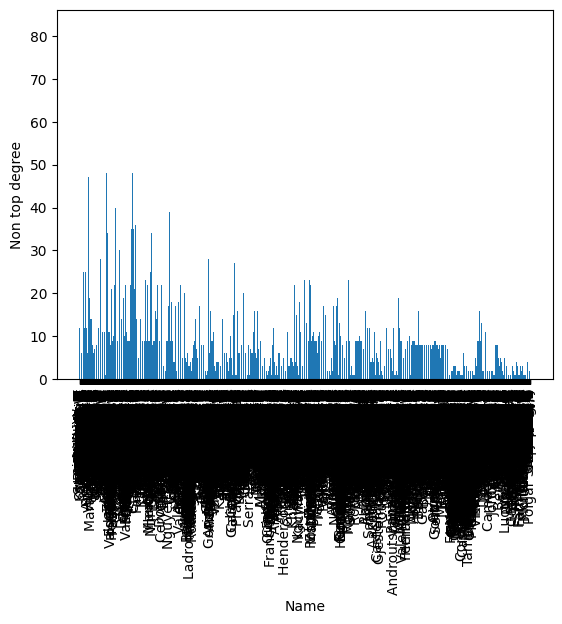

In [130]:
plt.bar(names_NONTOP, degree_valNONTOP)
plt.xlabel('Name')
plt.ylabel('Non top degree')
plt.xticks(rotation=90)